In [204]:
!pip install -U bioinfokit

In [205]:
# Import libraries
import numpy as np
import pandas as pd
from bioinfokit.visuz import cluster
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [206]:
# Call the dataset
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [207]:
# Column names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [208]:
# Shape of the data
df.shape

(1453, 15)

In [209]:
# Apply label encoder on our categorical data
x = df.iloc[:, 0:11]
labelencoder = LabelEncoder()
MD_x = x.apply(labelencoder.fit_transform)
MD_x
# We have 11 features with numeric data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [210]:
# Calculate mean of our label encoded columns
column_means = MD_x.mean()
column_means

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [211]:
MD_x.dtypes

yummy         int64
convenient    int64
spicy         int64
fattening     int64
greasy        int64
fast          int64
cheap         int64
tasty         int64
expensive     int64
healthy       int64
disgusting    int64
dtype: object

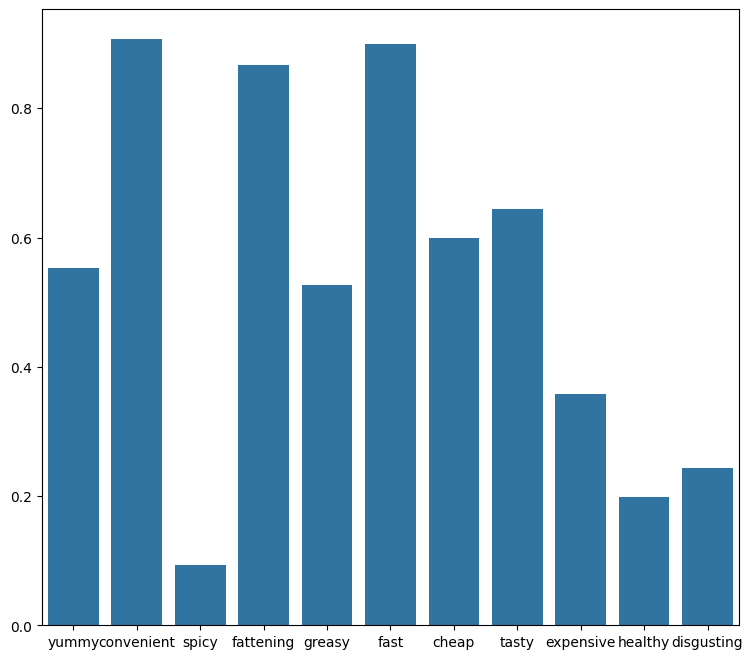

In [212]:
# Plot graph for variable.
plt.figure(figsize=(9,8))
sns.barplot(column_means)
plt.show()

## PCA (Principal compenent Analysis)
A principal components analysis (PCA) can be used to create a perceptual map, which provides initial insights into how different attributes are rated by respondents. This map helps identify which attributes tend to be rated similarly.

In this context, PCA is not used to reduce the number of variables but to rotate and project the data for visualization. This method, also known as factor-cluster analysis, is generally less effective than clustering raw data. The analysis is conducted on unstandardized data because the segmentation variables are binary.

In [213]:
from sklearn.decomposition import PCA

In [214]:
#To analyse the data, perform PCA and create a perceptual map that shows which attributes tend to be rated in the same way.
pca = PCA()
MD_pca=pca.fit_transform(MD_x)
MD_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [215]:
explained_variance = pca.explained_variance_ratio_
standard_deviation = np.sqrt(pca.explained_variance_)
cumulative_proportion = np.cumsum(explained_variance)

In [216]:
# Create a list of index labels for the DataFrame
index = []
for i in range(len(standard_deviation)):
    i = i + 1
    index.append("PC{}".format(i))


pca_summary = pd.DataFrame({
    'Standard deviation': standard_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_proportion
},index)
print(pca_summary)


      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables.

In [217]:
# Create a rotation matrix
# The rotation matrix is a matrix that contains the factor loadings for each principal component.
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=MD_x.columns.values, columns=index)

In [218]:
print(standard_deviation.round(1))

[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [219]:
print(-loadings_df.round(3))

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113  0.018   
spicy       0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003   
fast        0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166   
cheap       0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089 -0.370  0.729  0.211  0.027  0.167  0.072   

             PC10   PC11  
yummy       0.110 -0.045  
convenient  0.666  0.

In [220]:
loadings_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,-0.058641,0.040820,-0.172914,0.111824,-0.031613,-0.195871,-0.017639,0.018674,0.018453,0.002284,-0.055044
std,0.310189,0.313316,0.259058,0.293675,0.314485,0.240412,0.315686,0.315621,0.315635,0.316219,0.310913
min,-0.476933,-0.610633,-0.802373,-0.354139,-0.729209,-0.594632,-0.385943,-0.627799,-0.639086,-0.665818,-0.541616
25%,-0.275448,-0.075406,-0.295854,-0.049955,-0.169936,-0.351458,-0.183682,-0.125660,-0.116497,-0.092959,-0.264973
50%,-0.108493,0.016414,-0.088571,0.067816,-0.003125,-0.210878,-0.059738,0.013041,-0.002847,-0.005338,0.019552
75%,0.210337,0.191956,-0.049767,0.225790,0.192769,-0.090078,0.004689,0.158182,0.121133,0.159358,0.149669
max,0.374753,0.601286,0.192051,0.763488,0.361399,0.209347,0.707637,0.589622,0.572403,0.454399,0.339265


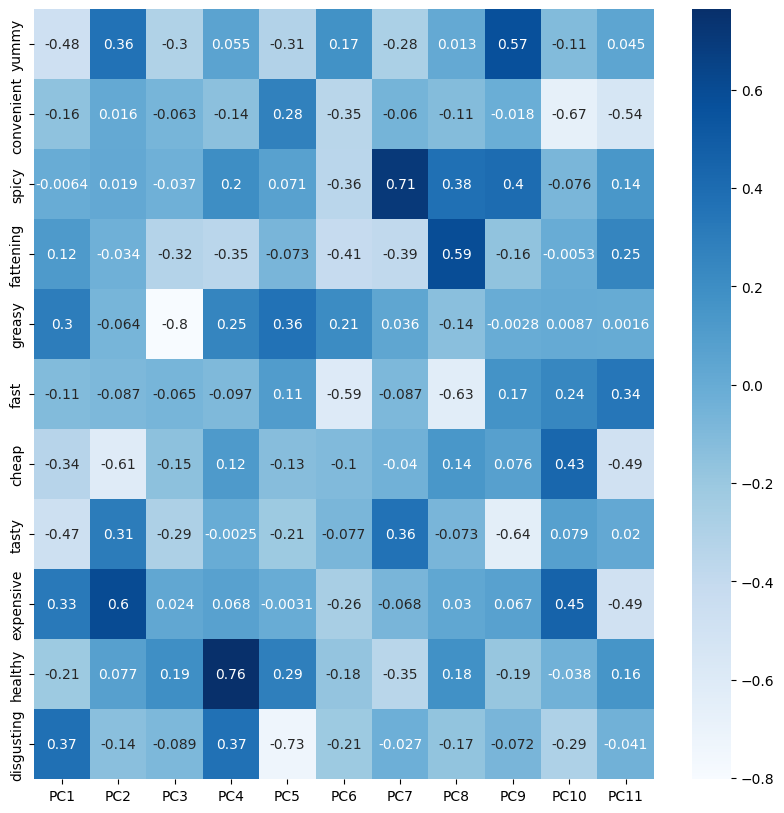

In [221]:
# Plot heatmap showing relation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loadings_df,annot=True, cmap='Blues')
plt.show()

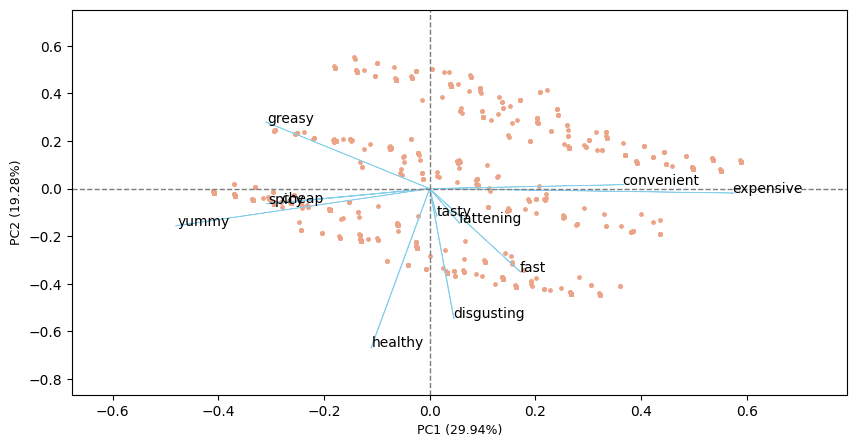

In [222]:
# get 2D biplot

#The biplot function is used to create a biplot, which is a graphical representation of the relationship between the principal components
# and the observed variables.

cluster.biplot(cscore=MD_pca, loadings=loadings, labels=df.columns.values,
            var1=round(explained_variance[0]*100, 2),
    var2=round(explained_variance[1]*100, 2),show=True,dim=(10,5))
plt.show()

Biplot shows a perceptual map of McDonald's attributes. CHEAP and EXPENSIVE are key, independent factors. Negative attributes like FATTENING, DISGUSTING, and GREASY are grouped together, while positive ones like FAST, CONVENIENT, HEALTHY, TASTY, and YUMMY are on the opposite side. Consumers cluster into three groups based on their view of CHEAP versus EXPENSIVE.

These insights are valuable for identifying consumer segments, highlighting strong attribute relationships and the importance of price.

## Extracting Segments
## 1. Using K-Means

In [223]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [224]:
#one to eight market segments using standard k-means analysis with ten random restarts
np.random.seed(1234)
within_cluster_distance = []
k_range = range(1, 9)
kmeans_results = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distance.append(kmeans.inertia_)
    kmeans_results[str(k)] = kmeans

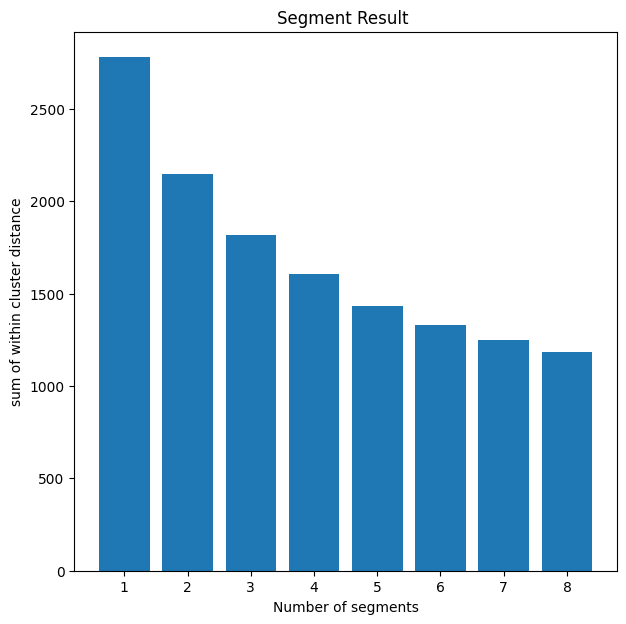

In [225]:
# Extract and plot inertia values to visualize the elbow method
inertia_values = [kmeans_results[str(k)].inertia_ for k in k_range]
plt.bar(k_range, within_cluster_distance)
plt.xlabel('Number of segments')
plt.ylabel('sum of within cluster distance')
plt.title('Segment Result ')
plt.show()

The scree plot lacks a distinct elbow, making it difficult to determine the ideal number of market segments.

An alternative method, stability-based data structure analysis, assesses if segments occur naturally or need artificial construction.
This approach evaluates the consistency of segmentation solutions across replications to ensure reliability and avoid unstable,random solutions.

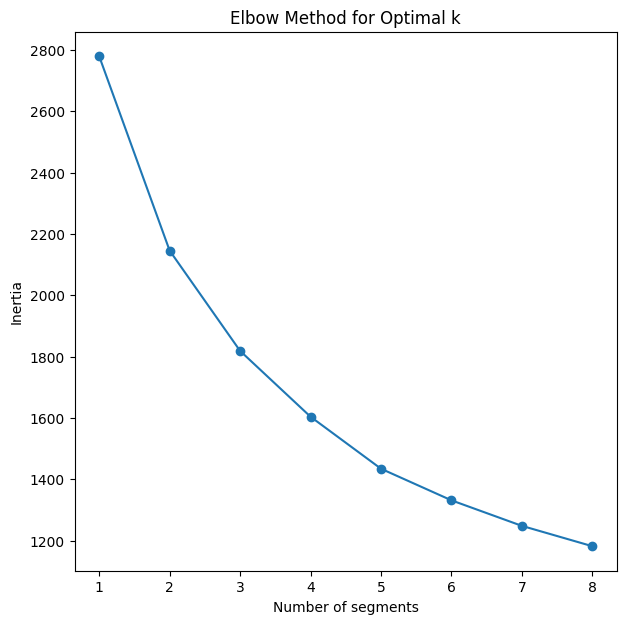

In [226]:
# Extract and plot inertia values to visualize the elbow method
inertia_values = [kmeans_results[str(k)].inertia_ for k in k_range]
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


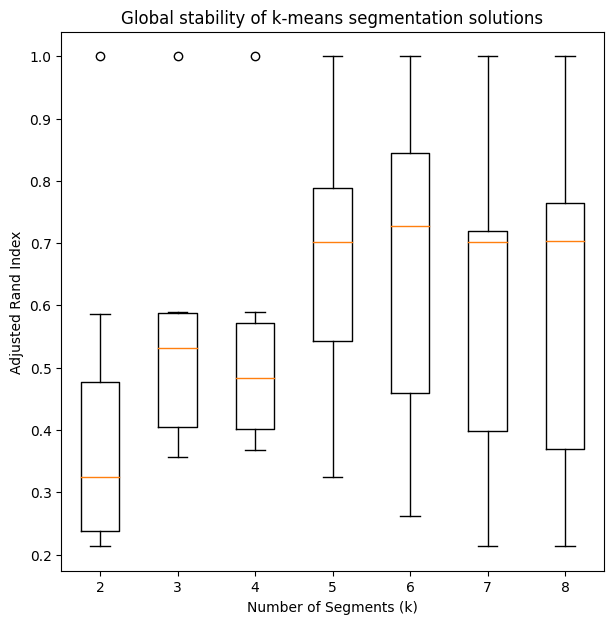

In [227]:
#Conduct  the analysis for each number of segments (between two and eight)
#using 2 × 100 bootstrap samples
#and ten random initialisations of k-means for each sample and number of segments.

from sklearn.metrics import adjusted_rand_score
results = {}
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_labels = kmeans_model.fit_predict(MD_x)
    results[str(k)] = kmeans_labels
    df['Cluster Number'] = kmeans_labels

# Calculating adjusted rand index for each k value
ari_values = []
for k1 in range(2, 9):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 9)])

# Convert ari_values to a NumPy array for easier plotting
ari_values = np.array(ari_values)

# Create a box plot
plt.boxplot(ari_values.T, labels=list(range(2, 9)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global stability of k-means segmentation solutions')
plt.show()

The vertical boxplots display the stability distribution for each number of segments. Higher stability indicates better results. Analysis of the figure suggests that the two, three, and four-segment solutions are quite stable.

However, the two and three-segment solutions lack differentiation in market insights. Increasing segments to five leads to a significant drop in stability.

Hence, the four-segment solution is considered optimal, offering a reasonable balance between segmentation depth and stability.

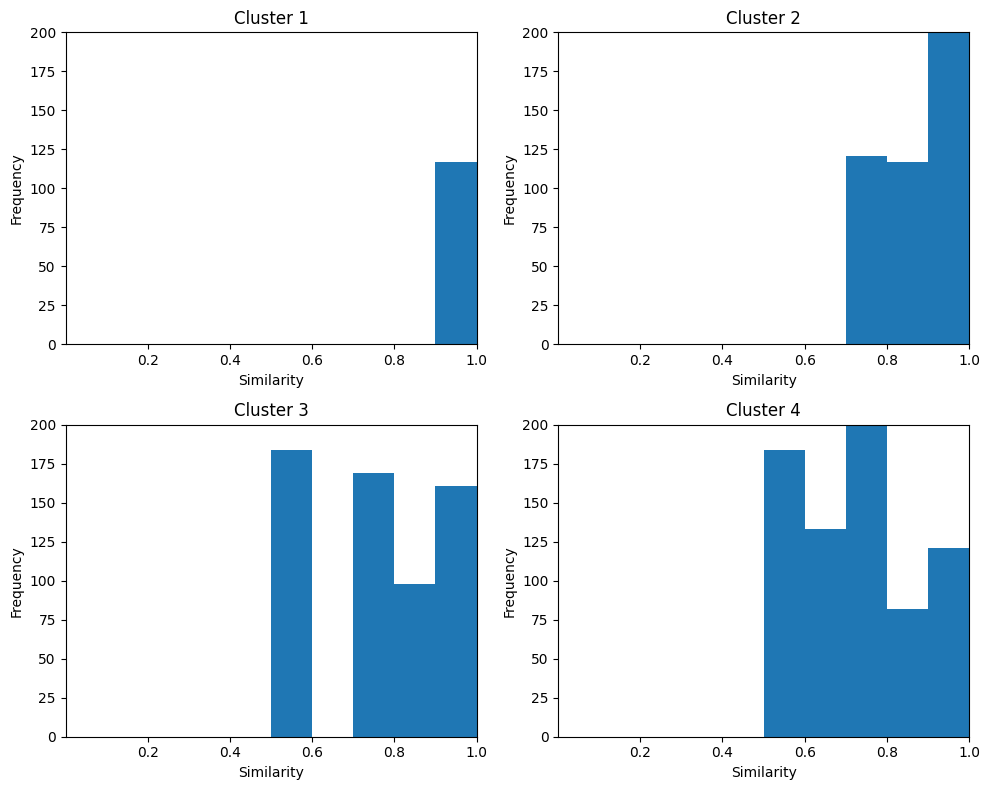

In [228]:
import matplotlib.pyplot as plt

# Define the range of values and the number of bins for the histogram.
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create a figure with subplots for each cluster.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# For each cluster, calculate the similarities between the points in the cluster and the cluster centroid.
for i in range(1, 5):

    similarities = kmeans_results[str(i)].transform(MD_x).min(axis=1)

    # Plot the histogram of the similarities.
    row = (i-1)//2
    col =  (i - 1) % 2
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    # Set the labels, title, and limits.
    axs[row, col].set(xlabel='Similarity', ylabel='Frequency', title=f'Cluster {i}', xlim=range_values, ylim=(0, max_frequency))
    axs[row, col].set_xticks([0.2, 0.4, 0.6, 0.8,1.0])

# Tighten the layout of the figure.
plt.tight_layout()
plt.show()


The segments depicted lack clear separation, with similarity values ranging between 0.3 and 0.7, indicating proximity to other segments.

Segments 2, 3, and 4 show high stability across varying segment numbers, suggesting they are consistent.

However, Segment 1 displays instability, drawing members from multiple segments in different solutions, indicating it may not be a reliable target segment despite the overall suitability of the four-segment solution.

## 2.Using Mixtures of distribution

In [229]:
# using Gaussian Mixture Models for clustering, evaluating information criteria, and comparing cluster assignments
# from different methods.
# Fit Gaussian Mixture Model for each k and collect criteria

from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    random_state=1234
)
gmm.fit(MD_pca)

cluster_assignments_gmm = gmm.predict(MD_pca)

model = KMeans(
    n_clusters=4,
    n_init=10,
    random_state=0
)
model.fit(MD_pca)
labels = model.predict(MD_pca)

conf_matrix = confusion_matrix(
    labels,
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[192   0  36  15]
 [  0   0 260  48]
 [ 58 124  10 161]
 [  1 303  55 190]]


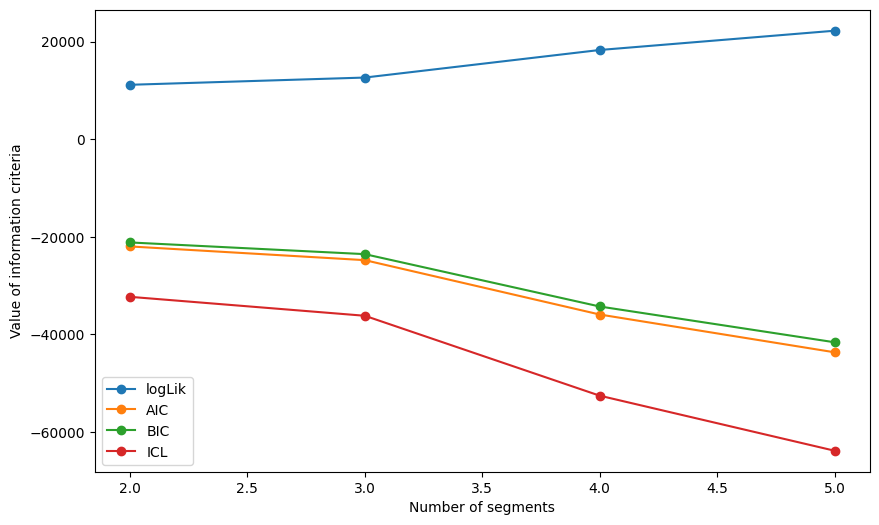

In [230]:
k_range = range(2, 6)
gmm_results = {}
criteria = {'logLik': [], 'AIC': [], 'BIC': [], 'ICL': []}

for k in k_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    gmm_results[k] = gmm
    criteria['logLik'].append(gmm.lower_bound_ * MD_x.shape[0])
    criteria['AIC'].append(gmm.aic(MD_x))
    criteria['BIC'].append(gmm.bic(MD_x))
    # ICL is approximated as BIC - logLik for simplicity
    criteria['ICL'].append(gmm.bic(MD_x) - gmm.lower_bound_ * MD_x.shape[0])

# Plot information criteria
plt.figure(figsize=(10, 6))
for crit in criteria:
    plt.plot(k_range, criteria[crit], marker='o', label=crit)
plt.xlabel('Number of segments')
plt.ylabel('Value of information criteria')
plt.legend()
plt.show()

Above information criteria plot shows how AIC, BIC, and ICL change with varying numbers of components. Although these criteria decrease notably until four components, strict inference theory suggests extracting seven segments. However, a more pragmatic view favors four segments, as beyond this, the decline in criteria becomes less pronounced.

## Profiling Segments

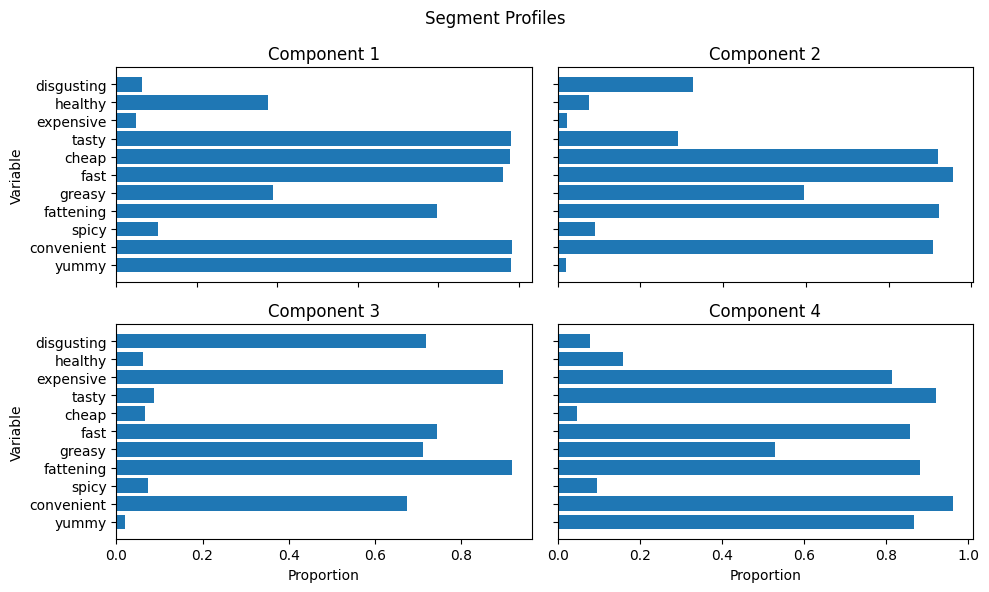

In [231]:
#Four market segments have been identified through segmentation analysis.
#To understand their meaning, a segment profile plot is generated.
#This plot highlights key characteristics of each segment and reveals differences between them.
# To enhance interpretability, hierarchical cluster analysis is applied to attributes, grouping similar ones together for clearer
#insights into each segment's characteristics.
# Select the k-means model with 4 clusters
kmeans = kmeans_results['4']

# label the assigned clusters by kmeans
labels = kmeans.labels_

# Group the data 'MD' by the cluster labels and calculate the mean of each cluster
MD_mean = MD_x.groupby(labels).mean()

# Create a 2x2 subplot figure with a size of 10x6 inches
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Create horizontal bar plots for each cluster's mean values on separate subplots
# and set titles for each subplot accordingly
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set common labels and ticks for all subplots
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

# Hide labels on inner subplots
for ax in axs.flat:
    ax.label_outer()


fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

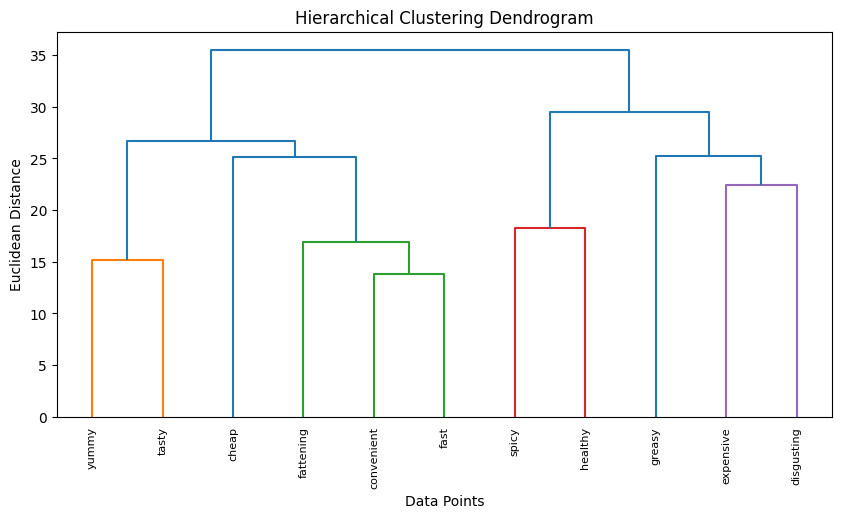

In [232]:
# Perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

MD_vclust = linkage(MD_x.transpose(), method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

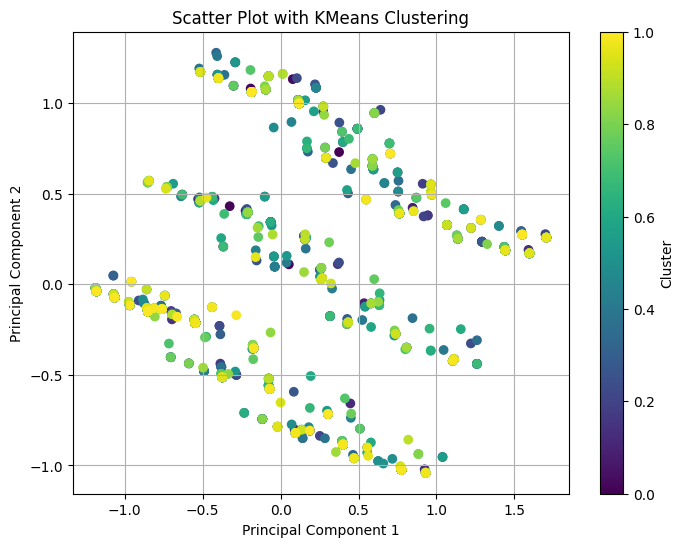

In [233]:
import matplotlib.cm as cm
color_sequence = cm.viridis(np.linspace(0, 1, len(MD_pca)))
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=color_sequence, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot with KMeans Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Describing Segments

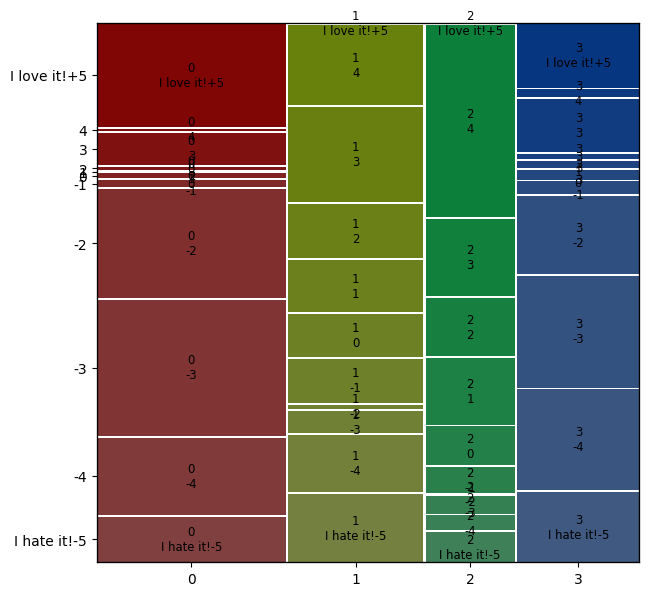

In [234]:
#The fast food dataset lacks sufficient descriptor variables typically used in market segmentation analysis.
# One available descriptor variable is consumers' love or hate for McDonald's.
# By using a mosaic plot, we visualize the relationship between segment membership and this variable.
#We extract segment membership for each consumer, cross-tabulate it with the love-hate variable,
#and generate the mosaic plot with shaded cells indicating deviations from expected frequencies if variables are unassociated.

from statsmodels.graphics.mosaicplot import mosaic

df['cluster_num'] = kmeans.labels_

# Create a crosstabulation between the cluster number and the 'Like' variable
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Reorder the columns to display the 'Like' variable in the proper order
crosstab.columns = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2',
                     '3', '4', 'I love it!+5']

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.show()



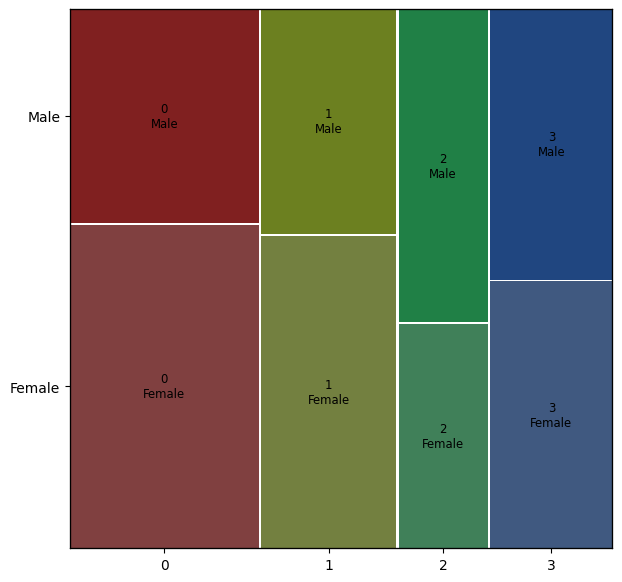

In [235]:
# Create a crosstabulation between the cluster number and the 'Gender' variable
crosstab = pd.crosstab(df['cluster_num'], df['Gender'])
# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.show()


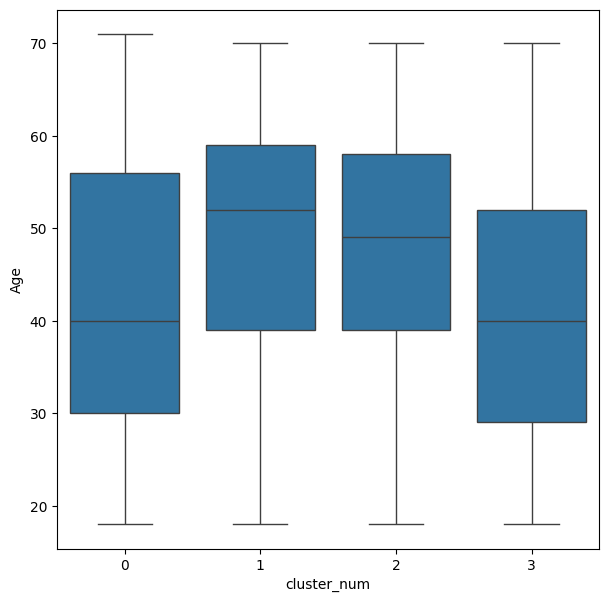

In [236]:
# Plot boxplot
sns.boxplot(x='cluster_num',y='Age',data=df)
plt.show()

## Selecting the target Segment

In [237]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])

# Group the data by 'cluster_num' and calculate the mean of 'Like' within each cluster
Like = df.groupby('cluster_num')['Like'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
# 'cluster_num' a regular column in the DataFrame named 'Like'
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.962963
1,1,5.144809
2,2,6.714876
3,3,3.602410


In [238]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Group the data by 'cluster_num' and calculate the mean of 'Gender' within each cluster
Gender = df.groupby('cluster_num')['Gender'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
# 'cluster_num' a regular column in the DataFrame named 'Gender'
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.397661
1,1,0.418033
2,2,0.582645
3,3,0.503012


In [239]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

# Group the data by 'cluster_num' and calculate the mean of 'Like' within each cluster
VF = df.groupby('cluster_num')['VisitFrequency'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
# 'cluster_num' a regular column in the DataFrame named 'Like'
VF = VF.to_frame().reset_index()
VF

,cluster_num,VisitFrequency
0,0,2.614035
1,1,2.718579
2,2,2.706612
3,3,2.536145


In [240]:
# prompt: dataframe of above columns with mean score

df_target = pd.DataFrame({
    'Like': Like['Like'],
    'Gender': Gender['Gender'],
    'VF': VF['VisitFrequency']
})
print(df_target)


       Like    Gender        VF
0  3.962963  0.397661  2.614035
1  5.144809  0.418033  2.718579
2  6.714876  0.582645  2.706612
3  3.602410  0.503012  2.536145


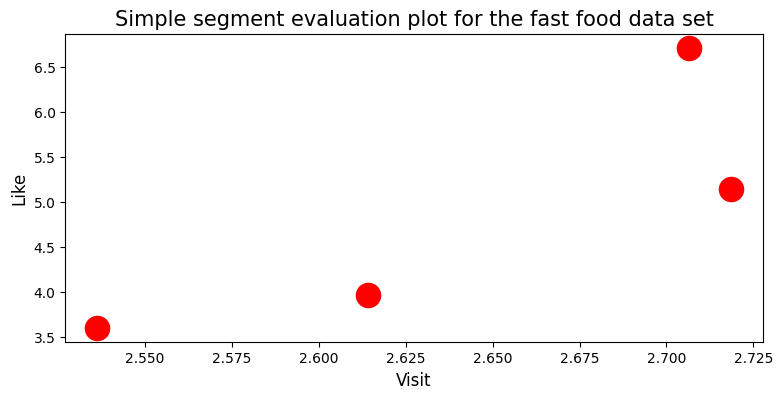

In [241]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VF", y = "Like", data=df_target, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

Scatter plot provides a simplified segment evaluation plot. Segments 3 and 4 are in the attractive quadrant, indicating frequent visits and positive feelings towards McDonald's. These segments should be retained and catered to.

 Segment 2, however, is least attractive, with members disliking McDonald's and rarely visiting.

Segment 1 has mixed perceptions but shows potential as a target market with some positive attributes.

 Addressing negative perceptions and reinforcing positives could broaden McDonald's customer base. This plot guides decision-making on which segments to target.